--Import Libraries

# **🎥📺 NETFLIX MOVIE DATASET ANALYSIS 📽**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the CSV file 'mymoviesdb.csv' into a pandas DataFrame
# Set newline character '\n' as the line terminator

df = pd.read_csv('mymoviesdb.csv', lineterminator='\n')

# Display the first 5 rows of the DataFrame
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [42]:
#viewing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [43]:
# Display the first 5 values from the 'Genre' column of the DataFrame
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [44]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [45]:
# Display summary statistics (count, mean, std, min, quartiles, max) for all numerical columns
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary**

- We have a dataframe consisting of 9827 rows and 9 columns
- Our dataset looks a bit tidy with no Nans nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year values.
- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll be drop them.
- There is noticeable outliers in Popularity column
- Vote_Average better be categorised for proper analysis.
- Genre column has comma seperated values and white spaces that needs to be handled and casted into category.Exploration Summary.

In [46]:
# Data Cleaning

Casting Release_Date column and extracing year values

In [47]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [48]:
# Convert the 'Release_Date' column to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# Print the data type of the 'Release_Date' column to confirm the conversion
print(df['Release_Date'].dtypes)

datetime64[ns]


In [49]:
# Extract only the year from the 'Release_Date' datetime column and overwrite it with the year as an integer
df['Release_Date'] = df['Release_Date'].dt.year

# Print the data type of the 'Release_Date' column to confirm it's now an integer
print(df['Release_Date'].dtypes)



int32


In [50]:
# Display concise summary of the DataFrame, including:
# - number of rows and columns
# - column names and data types
# - non-null value counts
# - memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


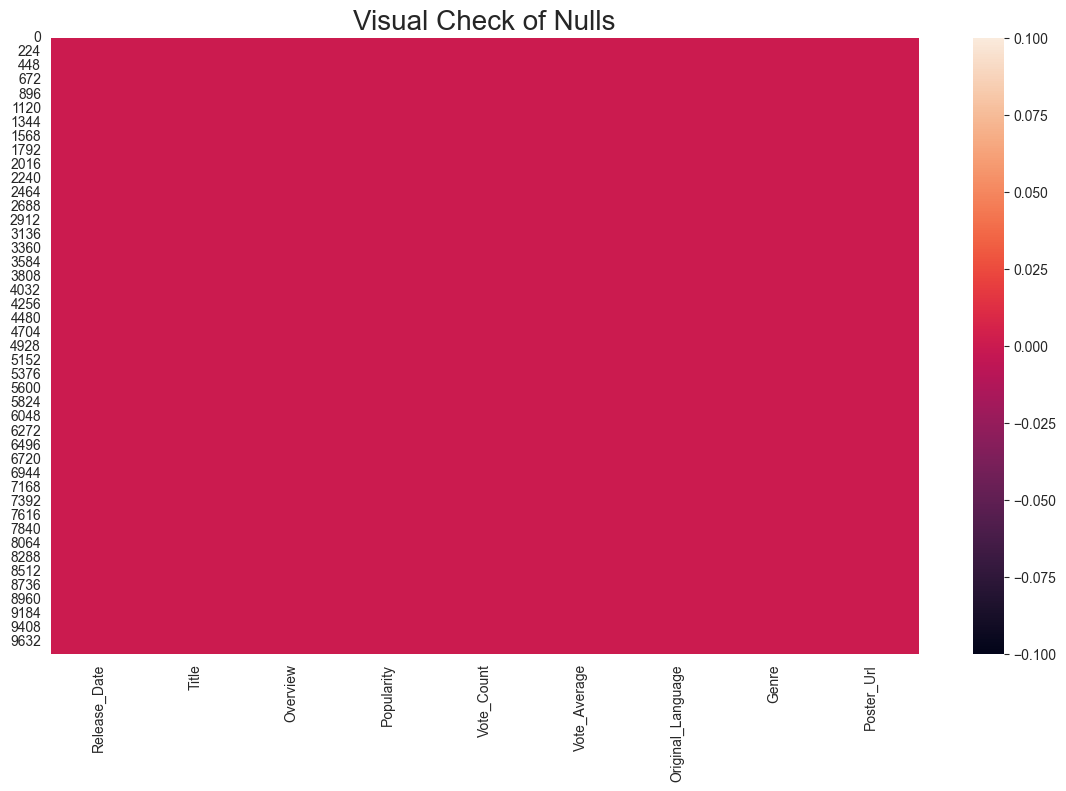

In [51]:
plt.figure(figsize=(14,8))                      # Set the figure size to 14 inches wide by 8 inches tall
sns.heatmap(df.isnull())                        # Generate a heatmap where missing values are highlighted (True = missing)
plt.title('Visual Check of Nulls', fontsize=20)  # Add a title with font size 20
plt.show()                                       # Display the plot


In [52]:
#The code df.head() displays the first 5 rows of your DataFrame df by default.
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# **Dropping Overview, Original_Language and Poster-Url**


In [53]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [54]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using categorize_col() function
provided above.


In [55]:
def categorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """
    # setting the edges to cut the column accordingly

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')

    return df


In [56]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [57]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [59]:
# Count the number of occurrences of each unique value in the 'Vote_Average' column
df['Vote_Average'].value_counts()


Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [60]:
# Drop all rows from the DataFrame that contain any NaN (missing) values
df.dropna(inplace = True)
# Confirm the drop by checking that there are now zero missing values in each column
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [61]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# **We convert the 'Genre' column from comma-separated strings into lists, then explode the DataFrame to create a new row for each individual genre, ensuring each movie-genre combination has its own row.**

In [62]:
# Split the 'Genre' column strings into lists of genres, using ', ' as the delimiter
df['Genre'] = df['Genre'].str.split(', ')
# Explode the lists in the 'Genre' column so each genre gets its own row
# Reset the index after exploding to maintain a clean sequential index
df = df.explode('Genre').reset_index(drop=True)
# Display the first 5 rows of the transformed DataFrame to verify changes
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [63]:
# Cast the 'Genre' column to the categorical data type to save memory and improve performance
df['Genre'] = df['Genre'].astype('category')
# Confirm the data type of the 'Genre' column to ensure it is now categorical
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [64]:
# Display concise summary of the DataFrame including:
# - number of rows and columns
# - column names and their data types
# - non-null value counts (to identify missing data)
# - memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [65]:
# Count the number of unique values in each column of the DataFrame
df.nunique()


Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis


# **Data Visualization**
**We employ Matplotlib and Seaborn libraries to generate a variety of informative visualizations. These visuals support exploratory data analysis by revealing the distribution, relationships, and trends within our data.**

In [26]:
# setting up seaborn configurations
sns.set_style('whitegrid')


# **Univariate Analysis of Movie Dataset**

# **1. Basic Statistics of Genre Column**

In [66]:
# showing stats. on genre column
df['Genre'].describe()


count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

- **This gives a quick overview of the distribution of genres by showing count, unique values, and the most frequent genre.**

# **2. Genre Distribution Visualizations**

**2.1 Bar Chart of Genre Counts**

# **2.1 Bar Chart of Genre Counts**

C:\Users\OM\AppData\Local\Temp\ipykernel_20340\2475765661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


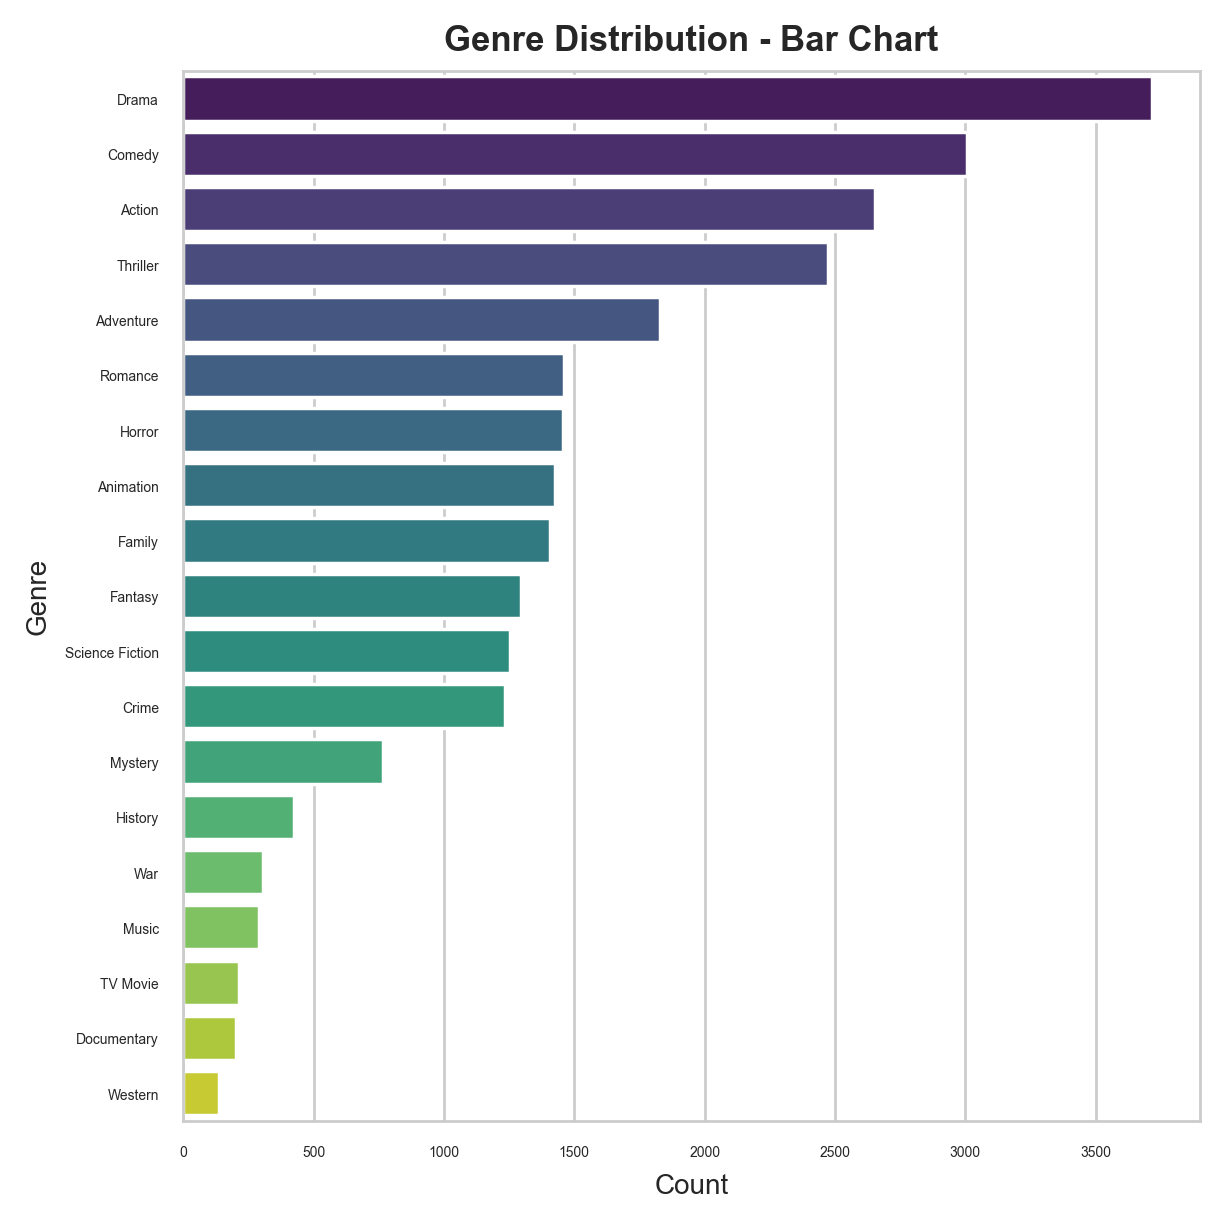

In [79]:
# Create a high-resolution bar plot to show counts of each Genre
plt.figure(figsize=(5, 5), dpi=250)  # High dpi for crispness
sns.countplot(
    y=df['Genre'],
    order=df['Genre'].value_counts().index,
    palette='viridis'  # Use a pleasant color palette visually pleasing and clear
)
plt.title('Genre Distribution - Bar Chart', fontsize=10, fontweight='bold')
plt.xlabel('Count', fontsize=8)
plt.ylabel('Genre', fontsize=8)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.tight_layout()  # Prevent overlapping labels
plt.show()

- **A vertical bar chart showing genre counts with a clear color palette and large, readable fonts ensures the graph is both professional and easy to read.**
- **We can notice from the above visual that Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.**


**2.2 Pie Chart of Genre Distribution**

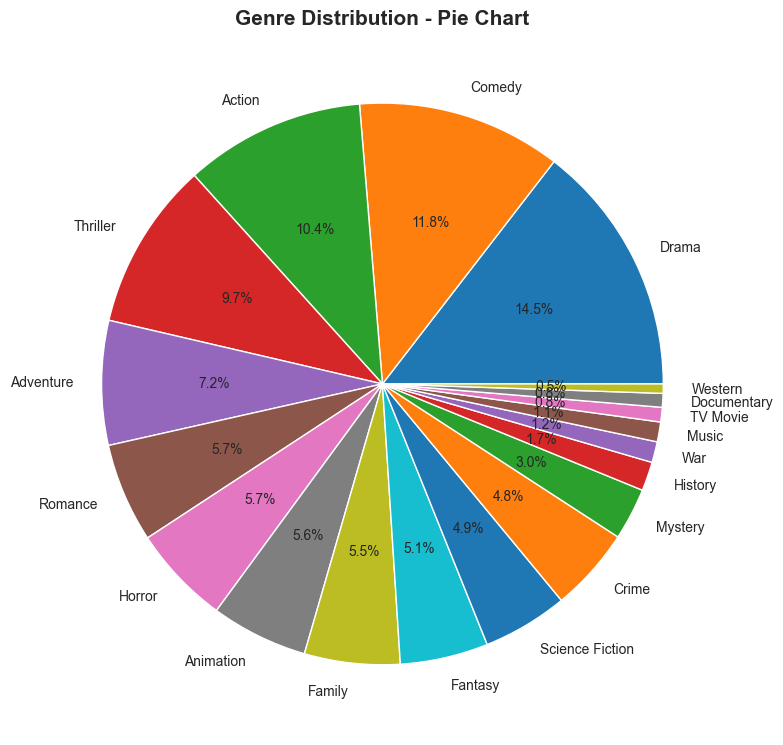

In [85]:
# Create a high-resolution pie chart showing genre percentage distribution
plt.figure(figsize=(8,8))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Genre Distribution - Pie Chart', fontsize=15, fontweight='bold')
plt.ylabel('')  # Hide y-label for better visual balance
plt.tight_layout()
plt.show()




- **A colorful and well-labeled pie chart that visually represents genre proportions clearly with sharp edges.**

# **3. Yearly Production Trends**



**3.1 Histogram of Movie Production by Year**

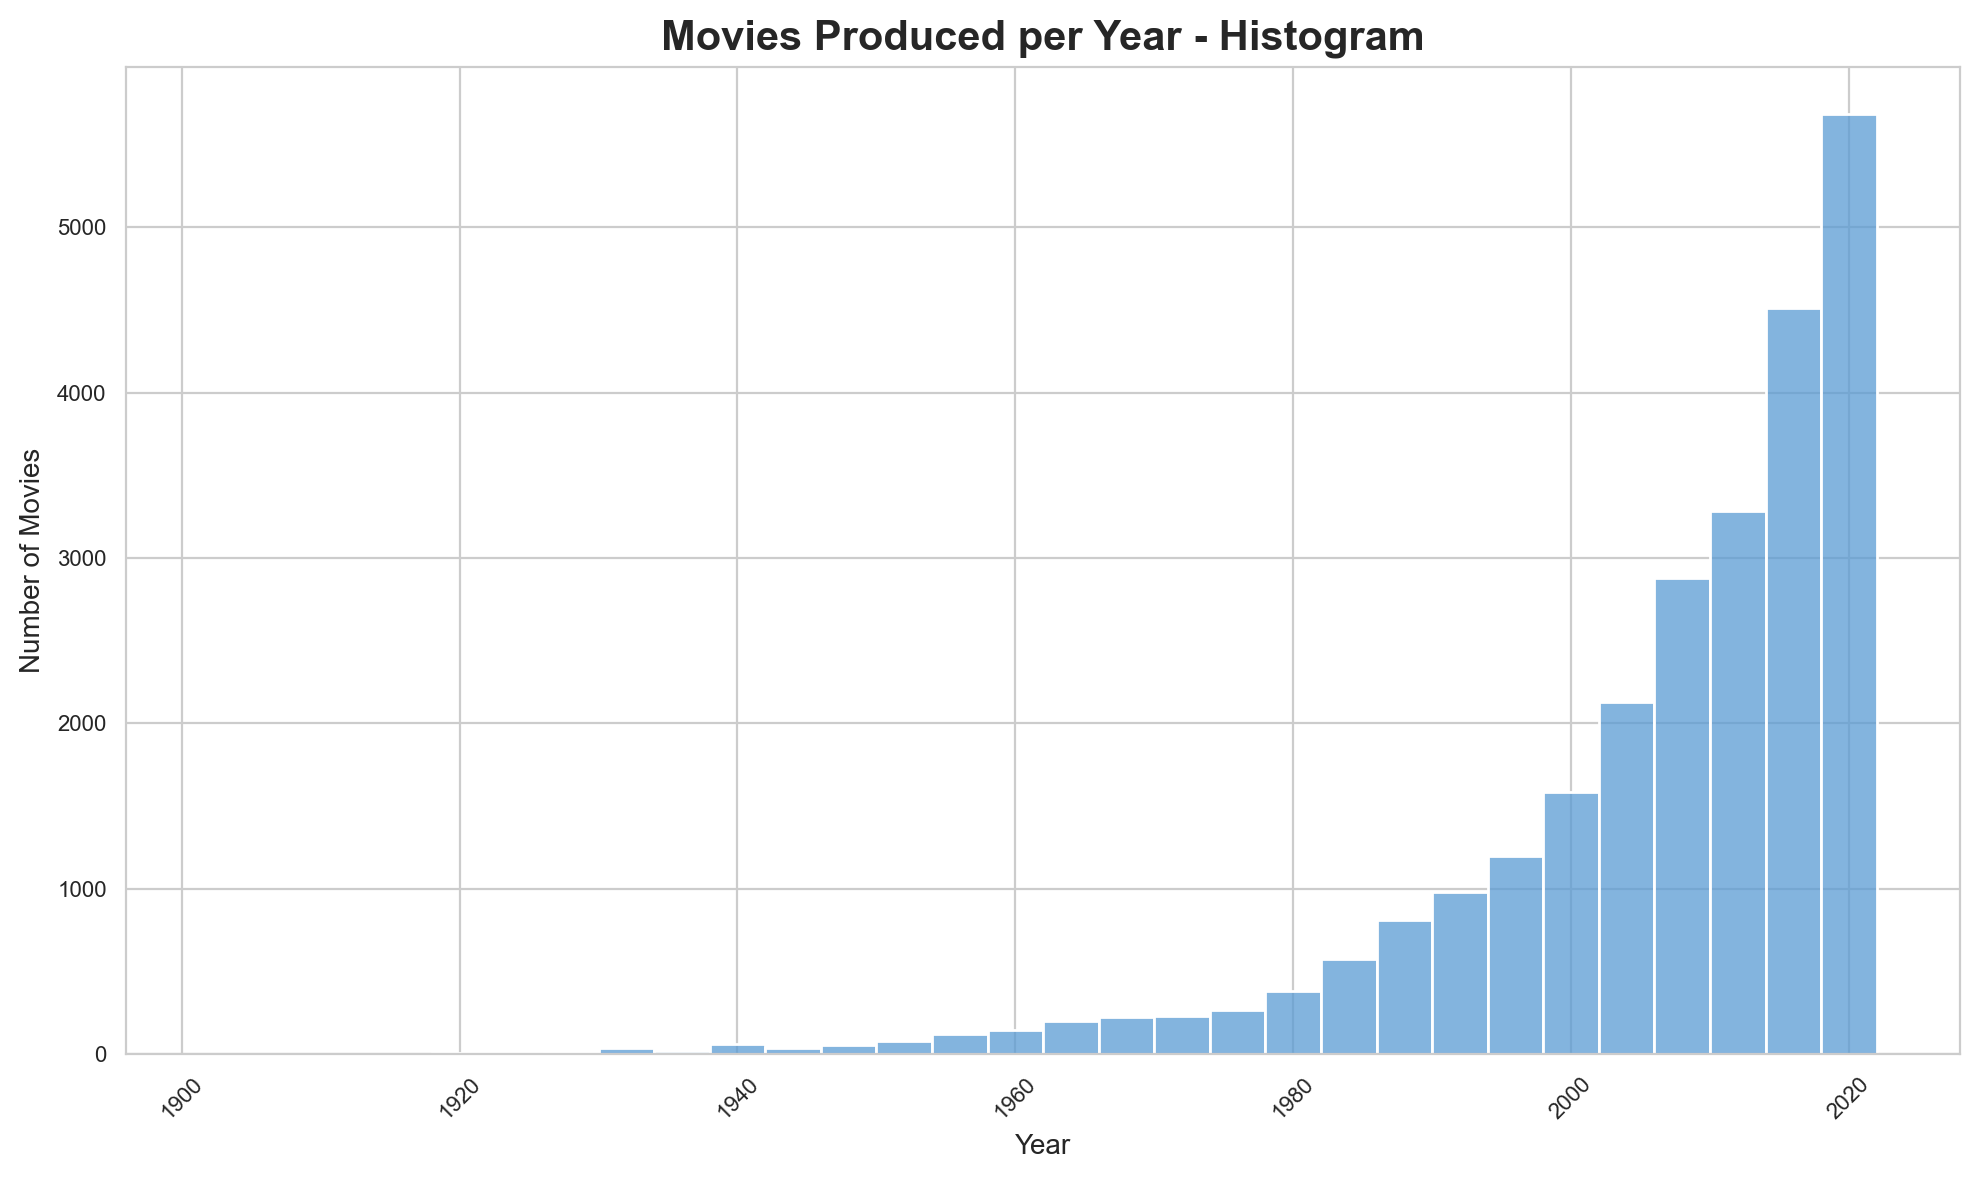

In [91]:
'''
plt.figure(figsize=(10,6))
sns.histplot(df['Release_Date'], bins=30, kde=False)
plt.title('Movies Produced per Year - Histogram')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
'''

plt.figure(figsize=(10, 6),dpi=200)
sns.histplot(df['Release_Date'], bins=30, color='#5a9bd4', kde=False)
plt.title('Movies Produced per Year - Histogram', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


- **Histogram with clear colors and font formatting, showing how many movies were produced each year over time.**

# **3.2 Line Plot of Yearly Movie Counts**

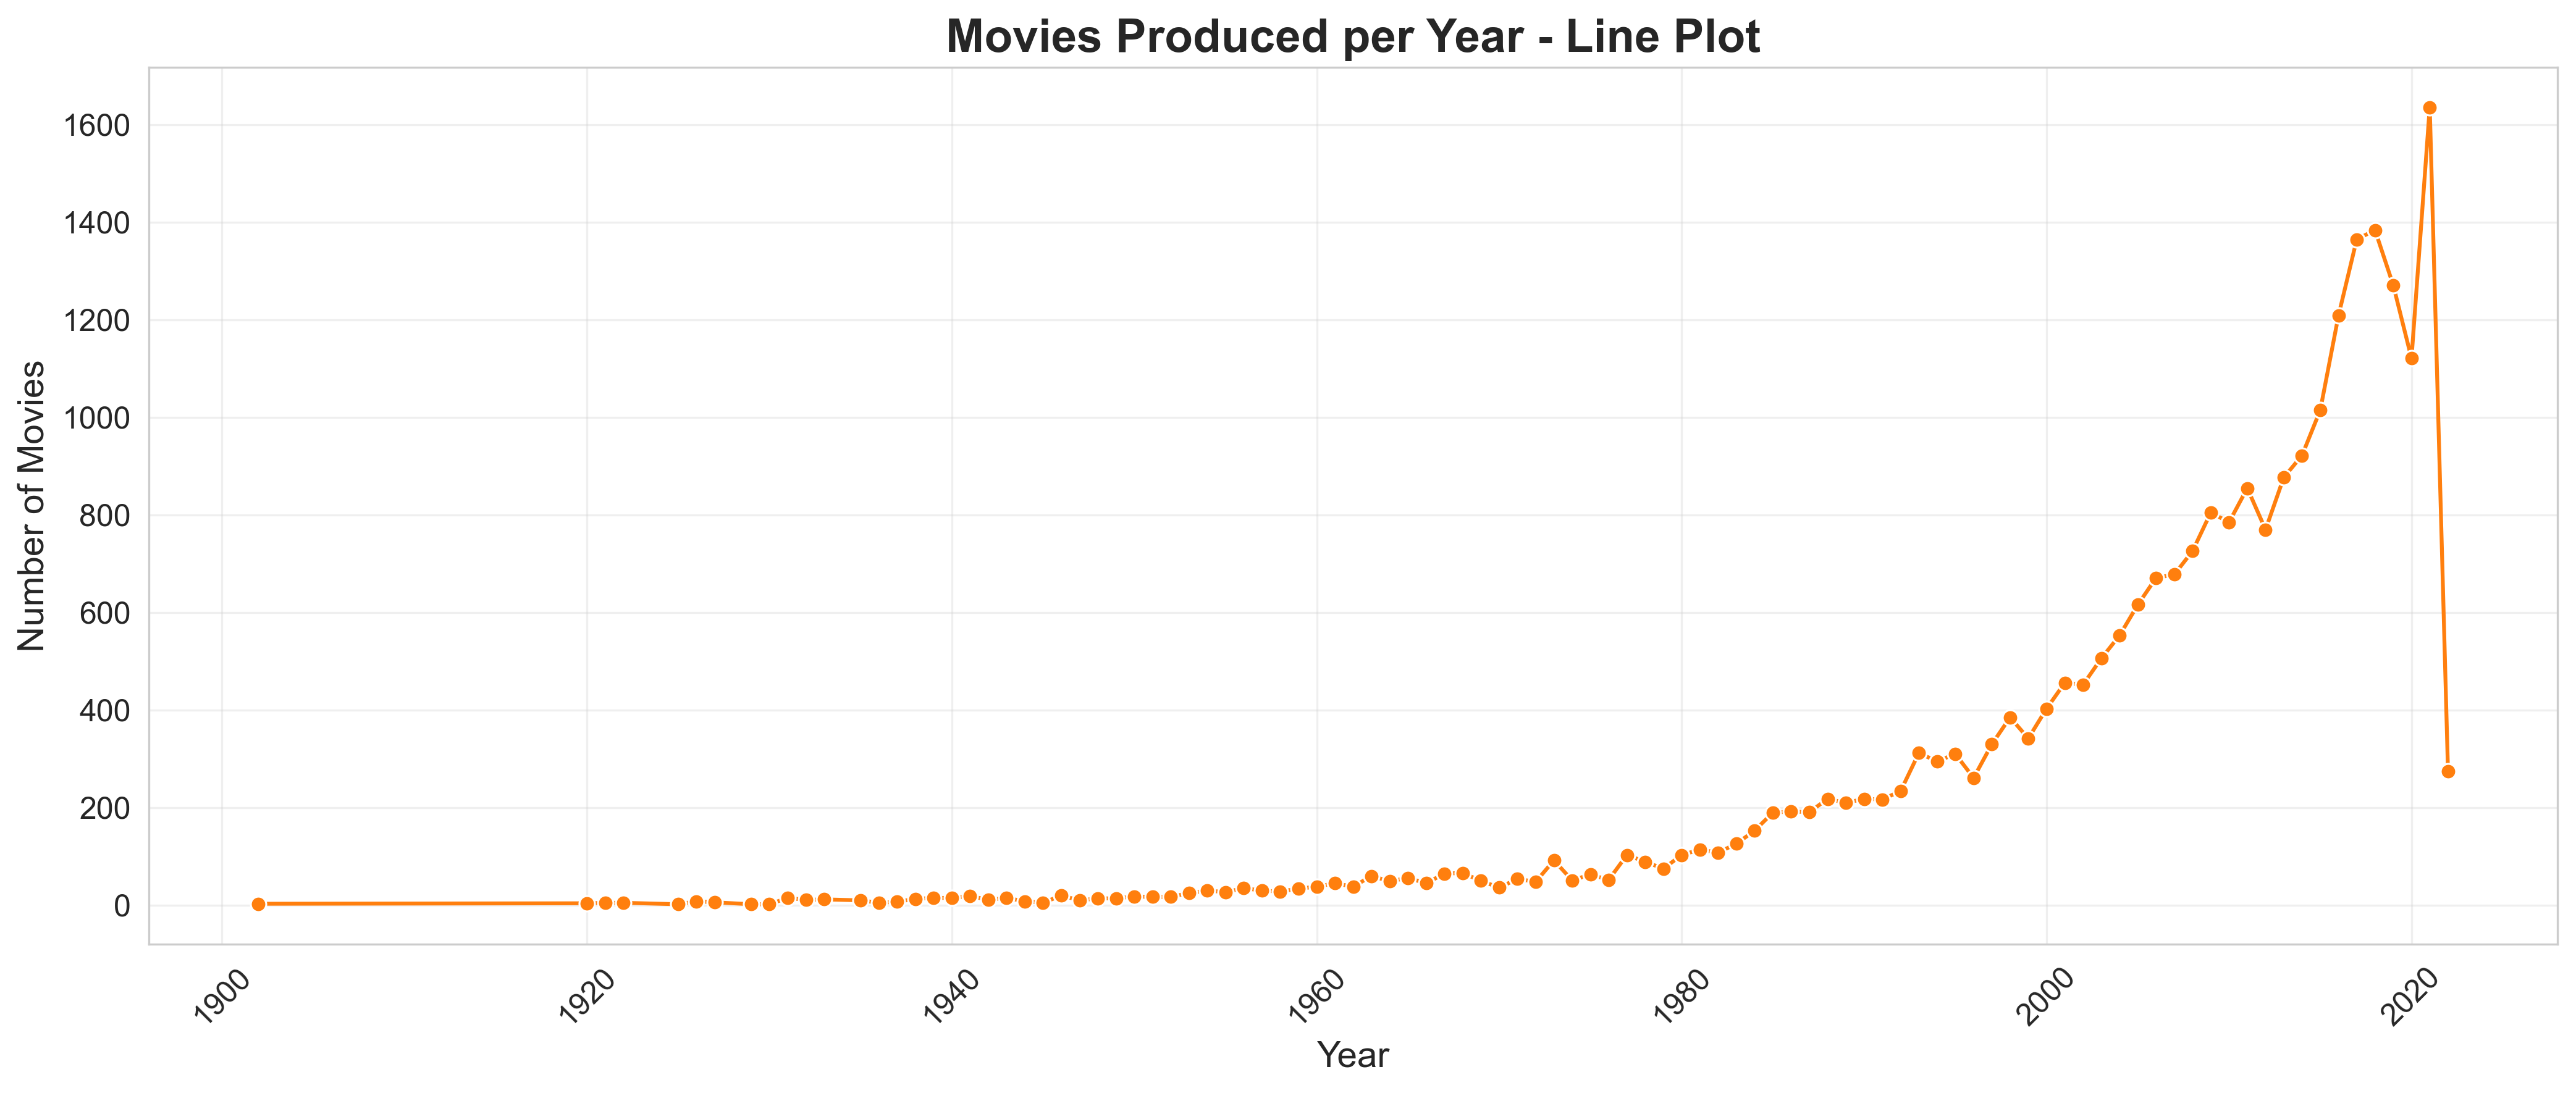

In [92]:
# Aggregate by year and sort for plotting
year_counts = df['Release_Date'].value_counts().sort_index()

plt.figure(figsize=(14, 6), dpi=300)
sns.lineplot(x=year_counts.index, y=year_counts.values, color='#ff7f0e', marker='o')
plt.title('Movies Produced per Year - Line Plot', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- **A smooth and colorful line chart with markers highlighting the production trend year-by-year.**

# **4. Popularity and Voting Metrics**



# **4.1 Vote Average Distribution - Count Plot with Hue**

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

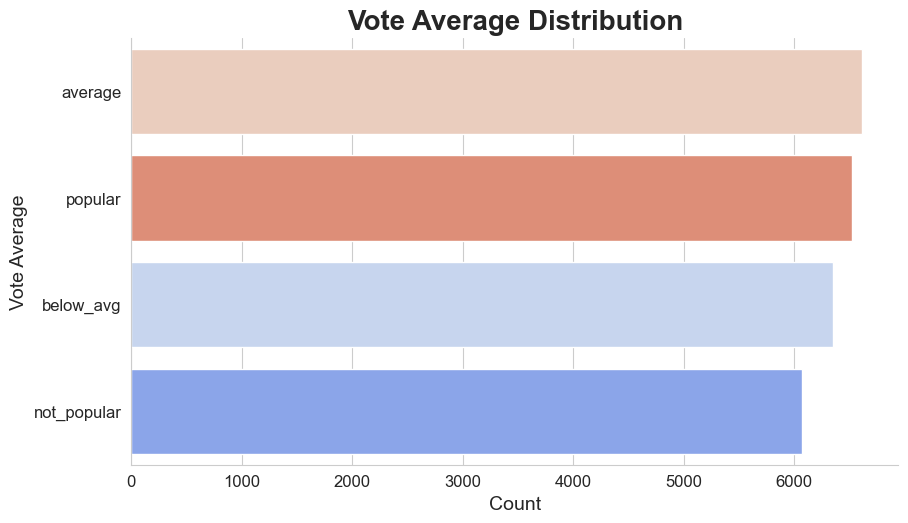

In [102]:
# Set style for clarity
sns.set_style('whitegrid')

# Create the catplot with increased figure size and DPI for better clarity
g = sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    hue='Vote_Average',
    order=df['Vote_Average'].value_counts().index,
    palette='coolwarm',
    height=5,               # Larger height
    aspect=1.8              # Wider aspect ratio
)

# Adjust the figure to have higher DPI (increase resolution)
g.fig.set_dpi(100)

# Set titles and labels with larger font sizes for clarity
plt.title('Vote Average Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)

# Increase tick label size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlaps
plt.tight_layout




- **This count plot uses a professional color palette for clear visual differentiation of vote averages.**

# **4.2 Vote Count Distribution - Histogram**

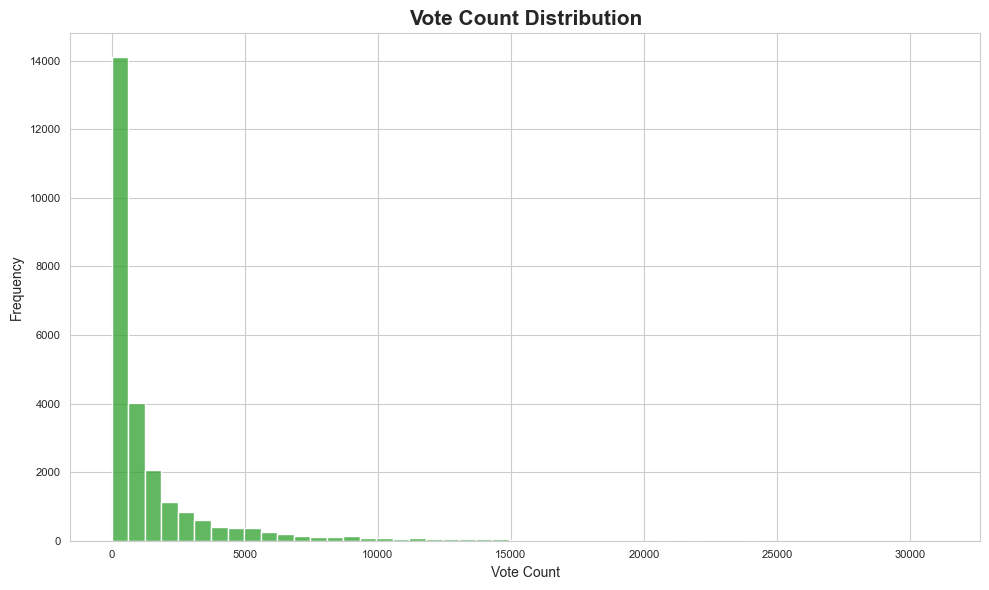

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vote_Count'], bins=50, color='#2ca02c')
plt.title('Vote Count Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Vote Count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


- **Histogram shows distribution of vote counts for movies with a clean green color.**

# **4.3 Popularity Distribution - Histogram**

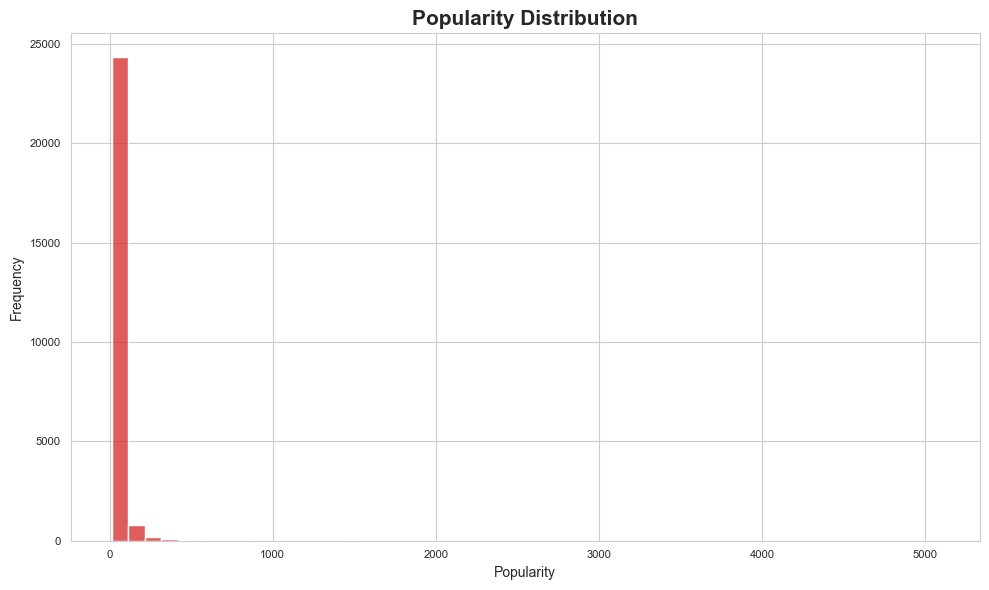

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=50, color='#d62728')
plt.title('Popularity Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

- **Red histogram for popularity helps distinguish it visually from vote counts.**

# **Bivariate Analysis of Movie Dataset**

# **1. Votes vs Popularity - Scatter Plot**

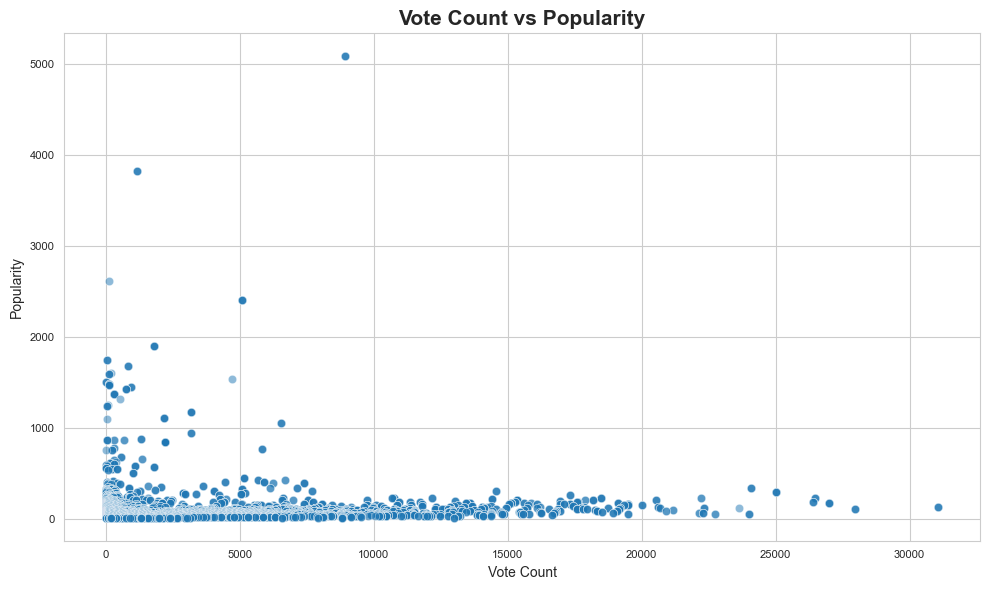

In [112]:
# Set high resolution and figure size for clarity
plt.figure(figsize=(10, 6))

# Scatter plot showing relationship between vote count and popularity
sns.scatterplot(data=df, x='Vote_Count', y='Popularity', alpha=0.5)

# Add title with clear font size
plt.title('Vote Count vs Popularity', fontsize=15, fontweight='bold')

# Label axes with readable font sizes
plt.xlabel('Vote Count', fontsize=10)
plt.ylabel('Popularity', fontsize=10)

# Increase tick label sizes for readability
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

- **This scatter plot visualizes how movies' vote counts relate to their popularity scores. The transparency (alpha=0.5) helps visualize concentration where points overlap.**

# **2. Movies per Genre per Year - Heatmap and Stacked Bar Chart**



# **2.1 Heatmap of Number of Movies per Genre per Year**

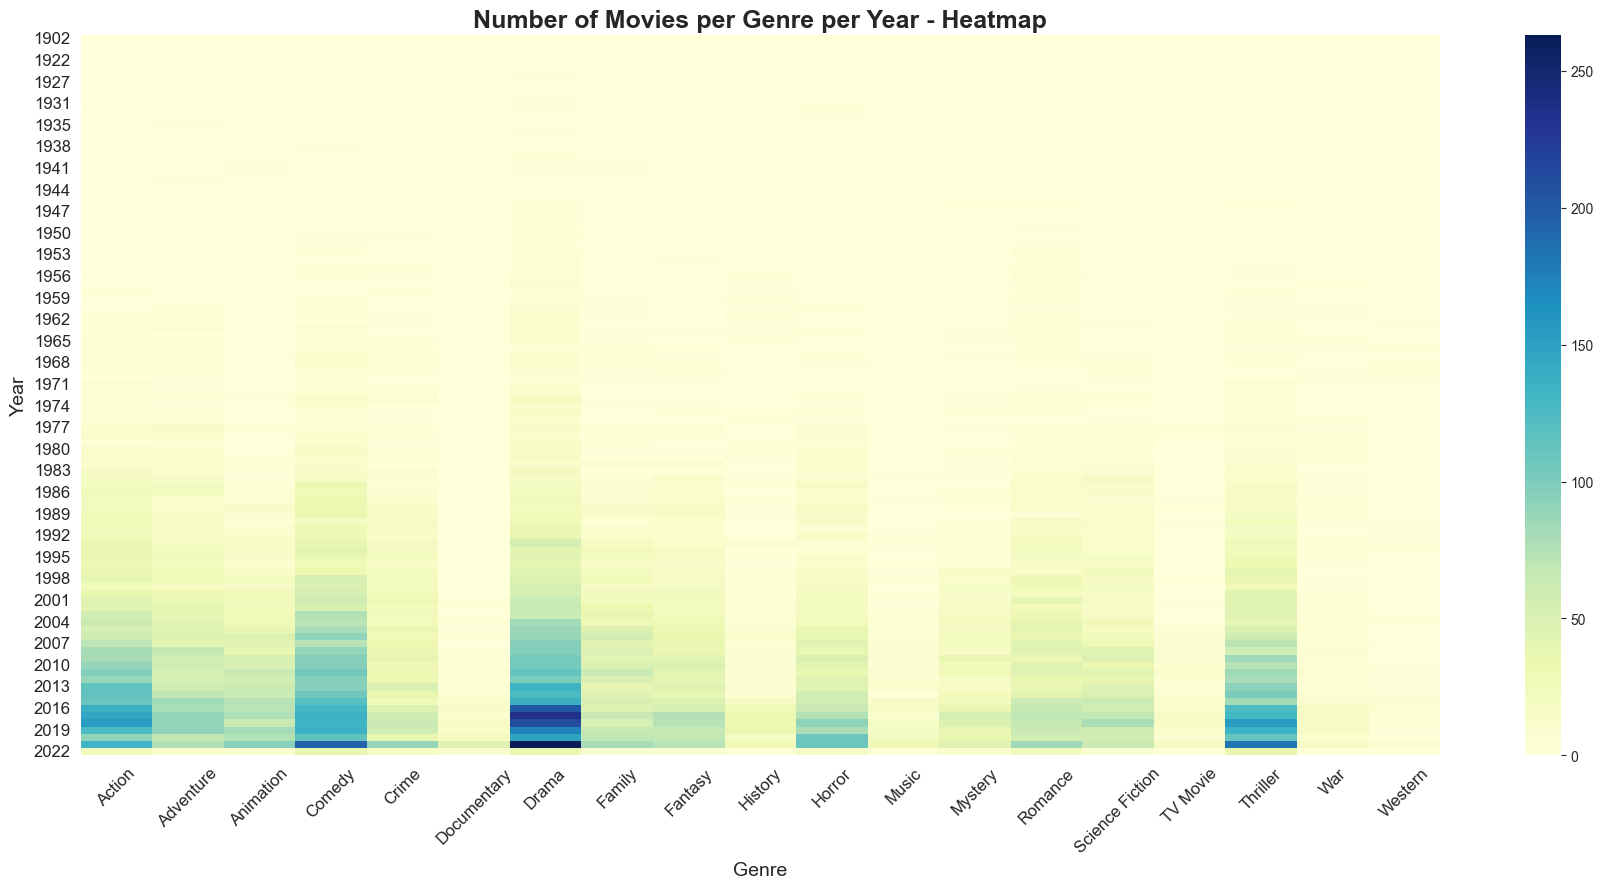

In [115]:
# Group data by year and genre, count movies, and reorganize into a matrix for plotting
genre_year = df.groupby(['Release_Date', 'Genre'], observed=False).size().unstack().fillna(0)

plt.figure(figsize=(18, 9))

# Heatmap to display number of movies for each genre across years
sns.heatmap(genre_year, cmap='YlGnBu')

plt.title('Number of Movies per Genre per Year - Heatmap', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Make genre labels readable and avoid cutting off
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


- **The heatmap illustrates the production volume of different genres over years, with color intensity representing counts.**

# **2.2 Stacked Bar Chart of Movies per Genre per Year**

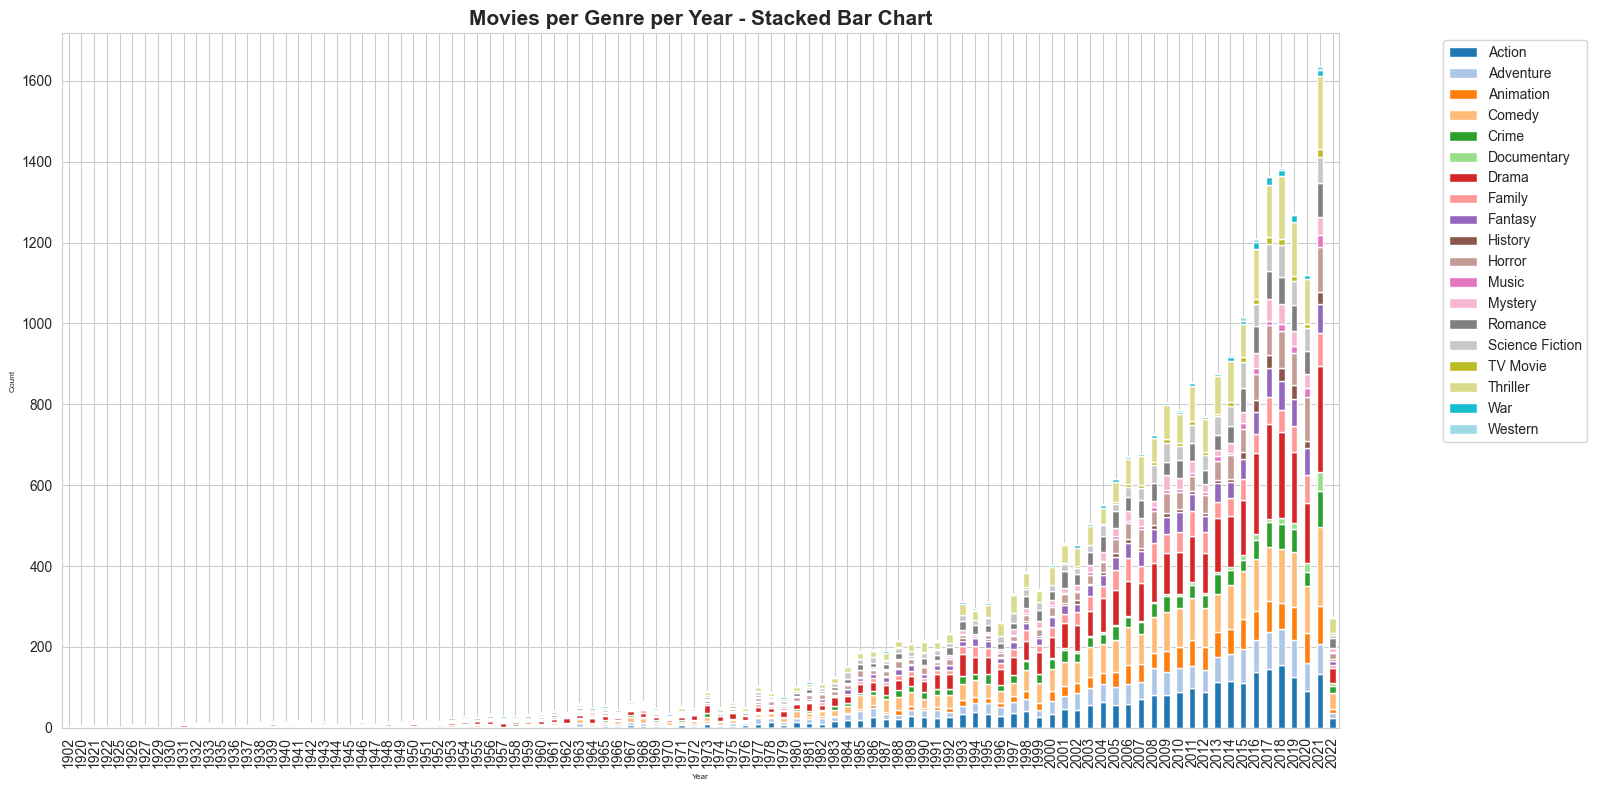

In [118]:
# Stacked bar chart to show genre distribution per year with distinct colors
genre_year.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

plt.title('Movies per Genre per Year - Stacked Bar Chart', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=6)
plt.ylabel('Count', fontsize=6)

# Legend placed outside for clarity
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)

plt.tight_layout()
plt.show()


- **The stacked bar chart provides an overview of genre popularity by year, showing the contribution of each genre to total movie production annually.**

# **3. Popularity by Genre and Vote Average - Boxplot**

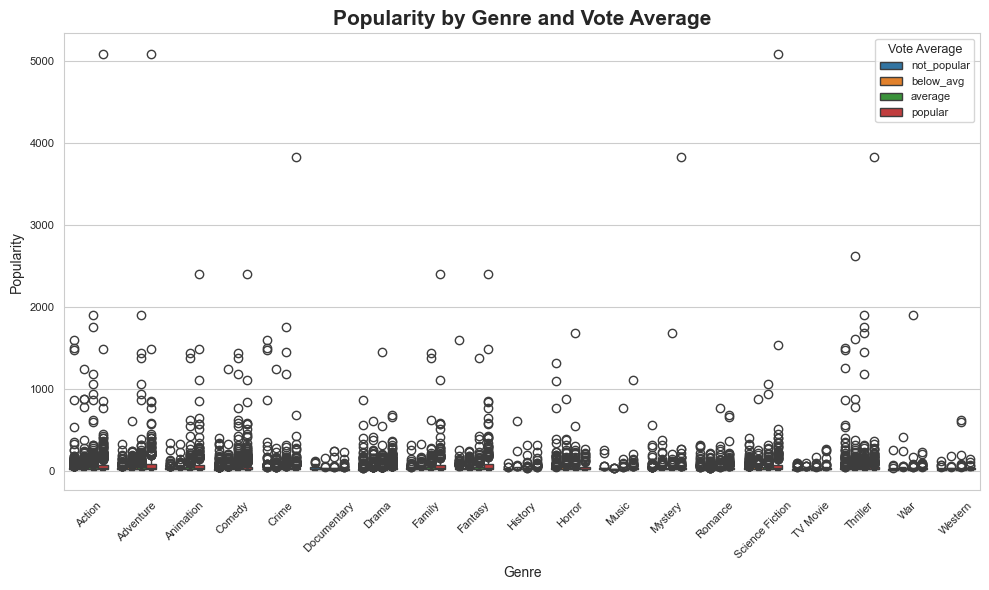

In [122]:
plt.figure(figsize=(10, 6))

# Boxplot to compare popularity scores grouped by genre and further separated by vote average category
sns.boxplot(x='Genre', y='Popularity', hue='Vote_Average', data=df)

plt.title('Popularity by Genre and Vote Average', fontsize=15, fontweight='bold')
plt.xlabel('Genre', fontsize=10)
plt.ylabel('Popularity', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.legend(title='Vote Average', fontsize=8, title_fontsize='9')

plt.tight_layout()
plt.show()


- **This boxplot visualizes the distribution of popularity for each genre split by vote average categories, showing how popularity varies within genres and vote groups.**

# **4. Genre Count by Vote Average Category - Count Plot**

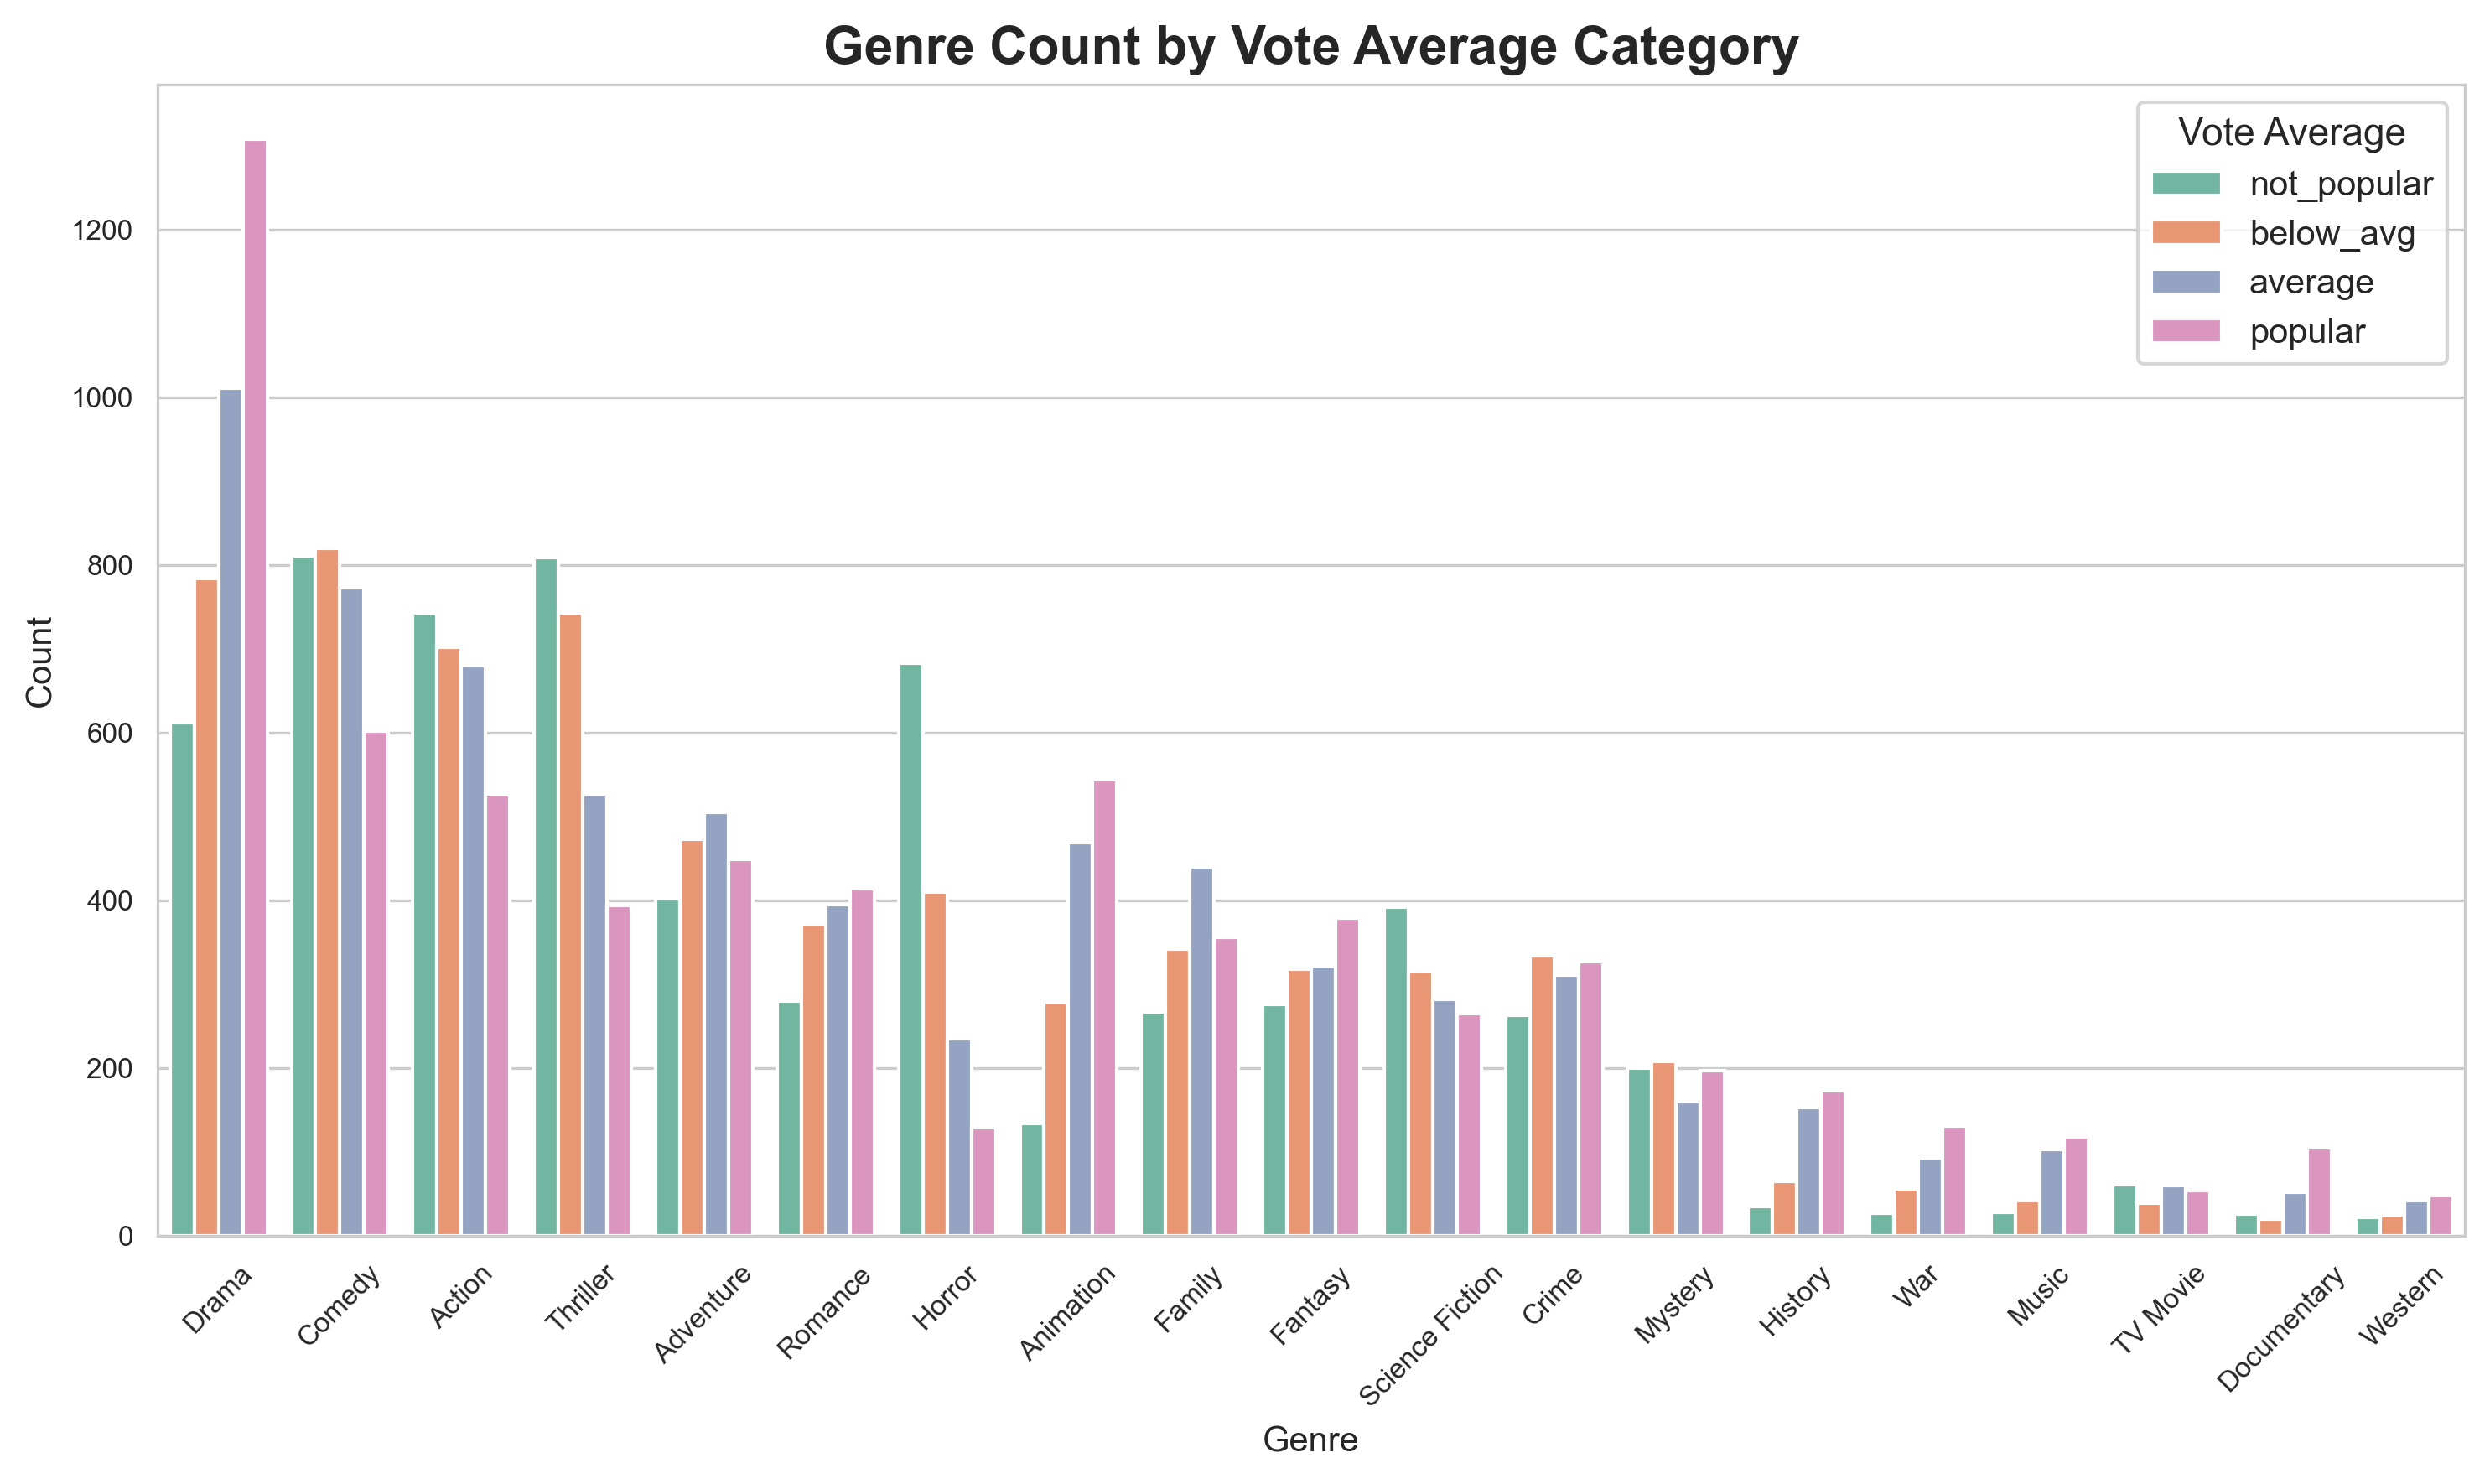

In [126]:
plt.figure(figsize=(10, 6), dpi=300)

# Count plot showing the frequency of each genre separated by vote average categories
sns.countplot(
    x='Genre',
    hue='Vote_Average',
    data=df,
    order=df['Genre'].value_counts().index,
    palette='Set2'
)

plt.title('Genre Count by Vote Average Category', fontsize=15, fontweight='bold')
plt.xlabel('Genre', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.legend(title='Vote Average', fontsize=10, title_fontsize='11')

plt.tight_layout()
plt.show()


- **This plot displays how the number of movies in each genre is distributed across different vote average categories, helping to understand genre popularity with respect to movie ratings.**

# **3. Multivariate Analysis of Movie Dataset**

# **1. Popularity by Year for Different Genres - FacetGrid Scatter Plots**

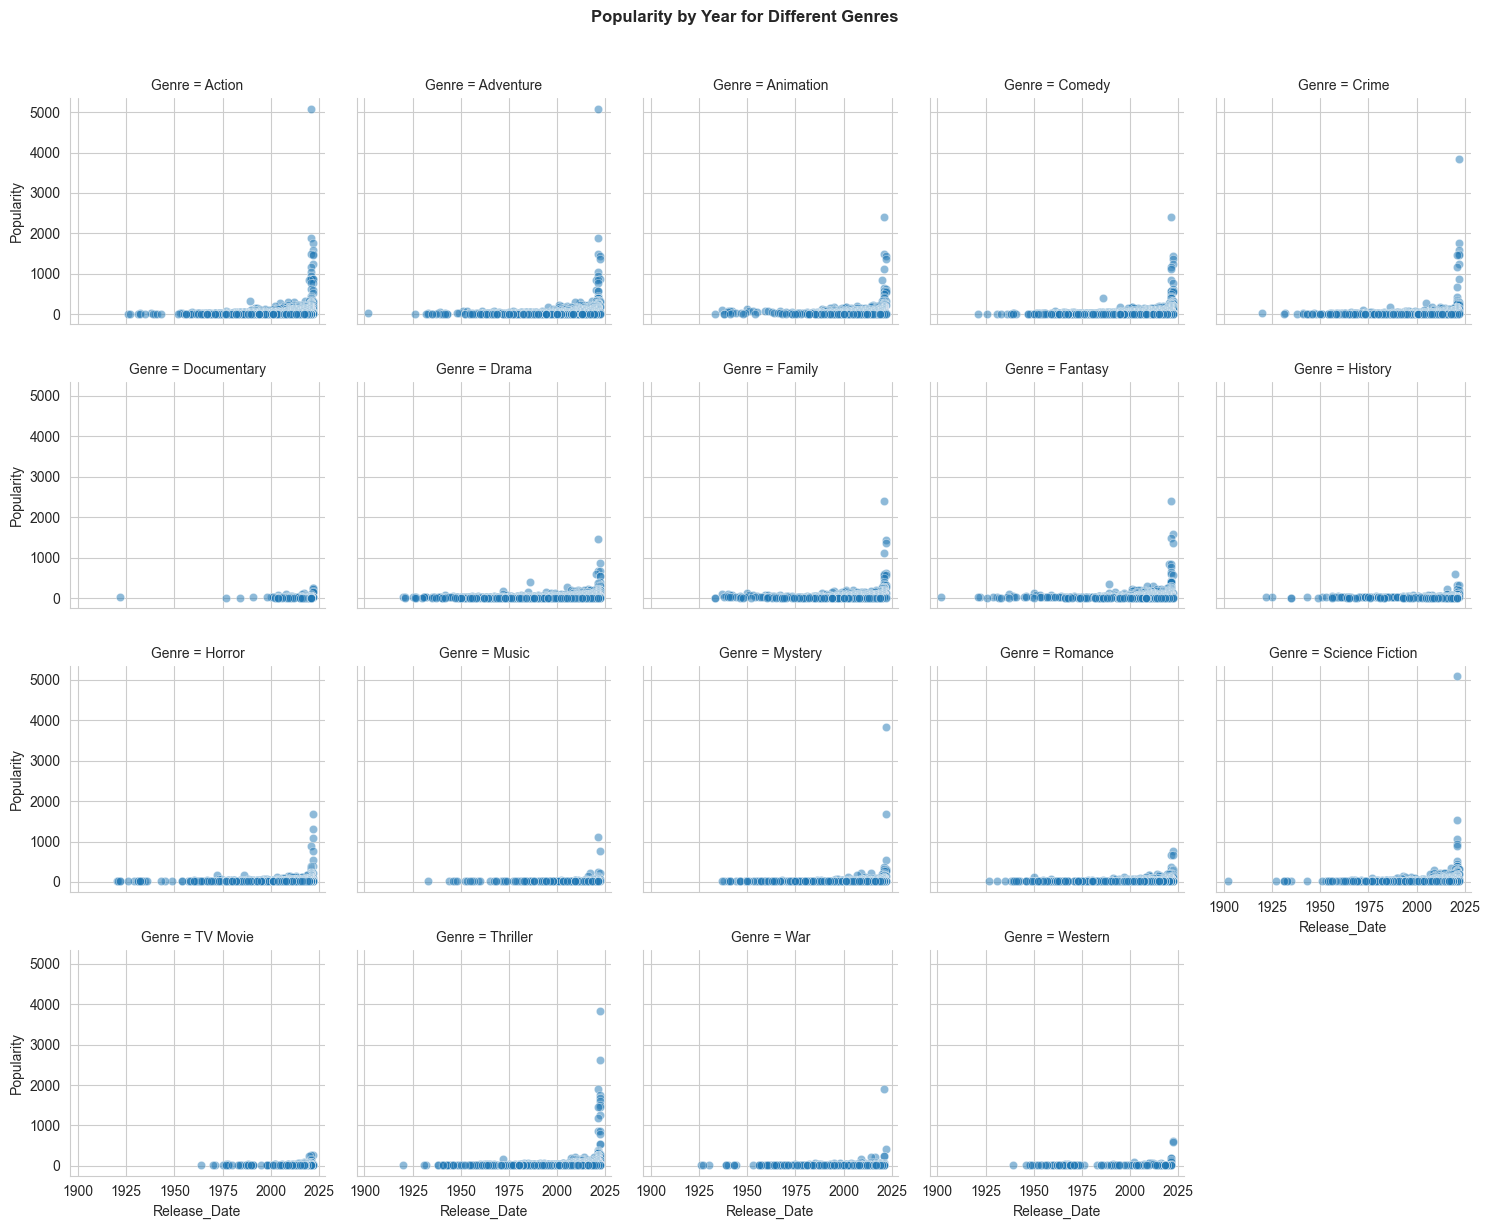

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid to plot scatterplots of Popularity over Release Year for each Genre
g = sns.FacetGrid(df, col='Genre', col_wrap=5, height=3, despine=True)

# Map scatterplots onto the grid, using alpha=0.5 for point transparency
g.map(sns.scatterplot, 'Release_Date', 'Popularity', alpha=0.5)

# Add a main title to the entire grid, slightly above to avoid overlapping with subplots
g.fig.suptitle('Popularity by Year for Different Genres', y=1.02, fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap between the main title and subplots
plt.tight_layout()

# Show the grid of plots
plt.show()


- **This creates a grid of scatterplots showing how popularity varies with release year separately for each genre. The faceted layout makes it easier to compare genre-specific trends across years. The transparency helps when points overlap.**

# **2. Vote Average vs Popularity per Genre - Violin Plot**

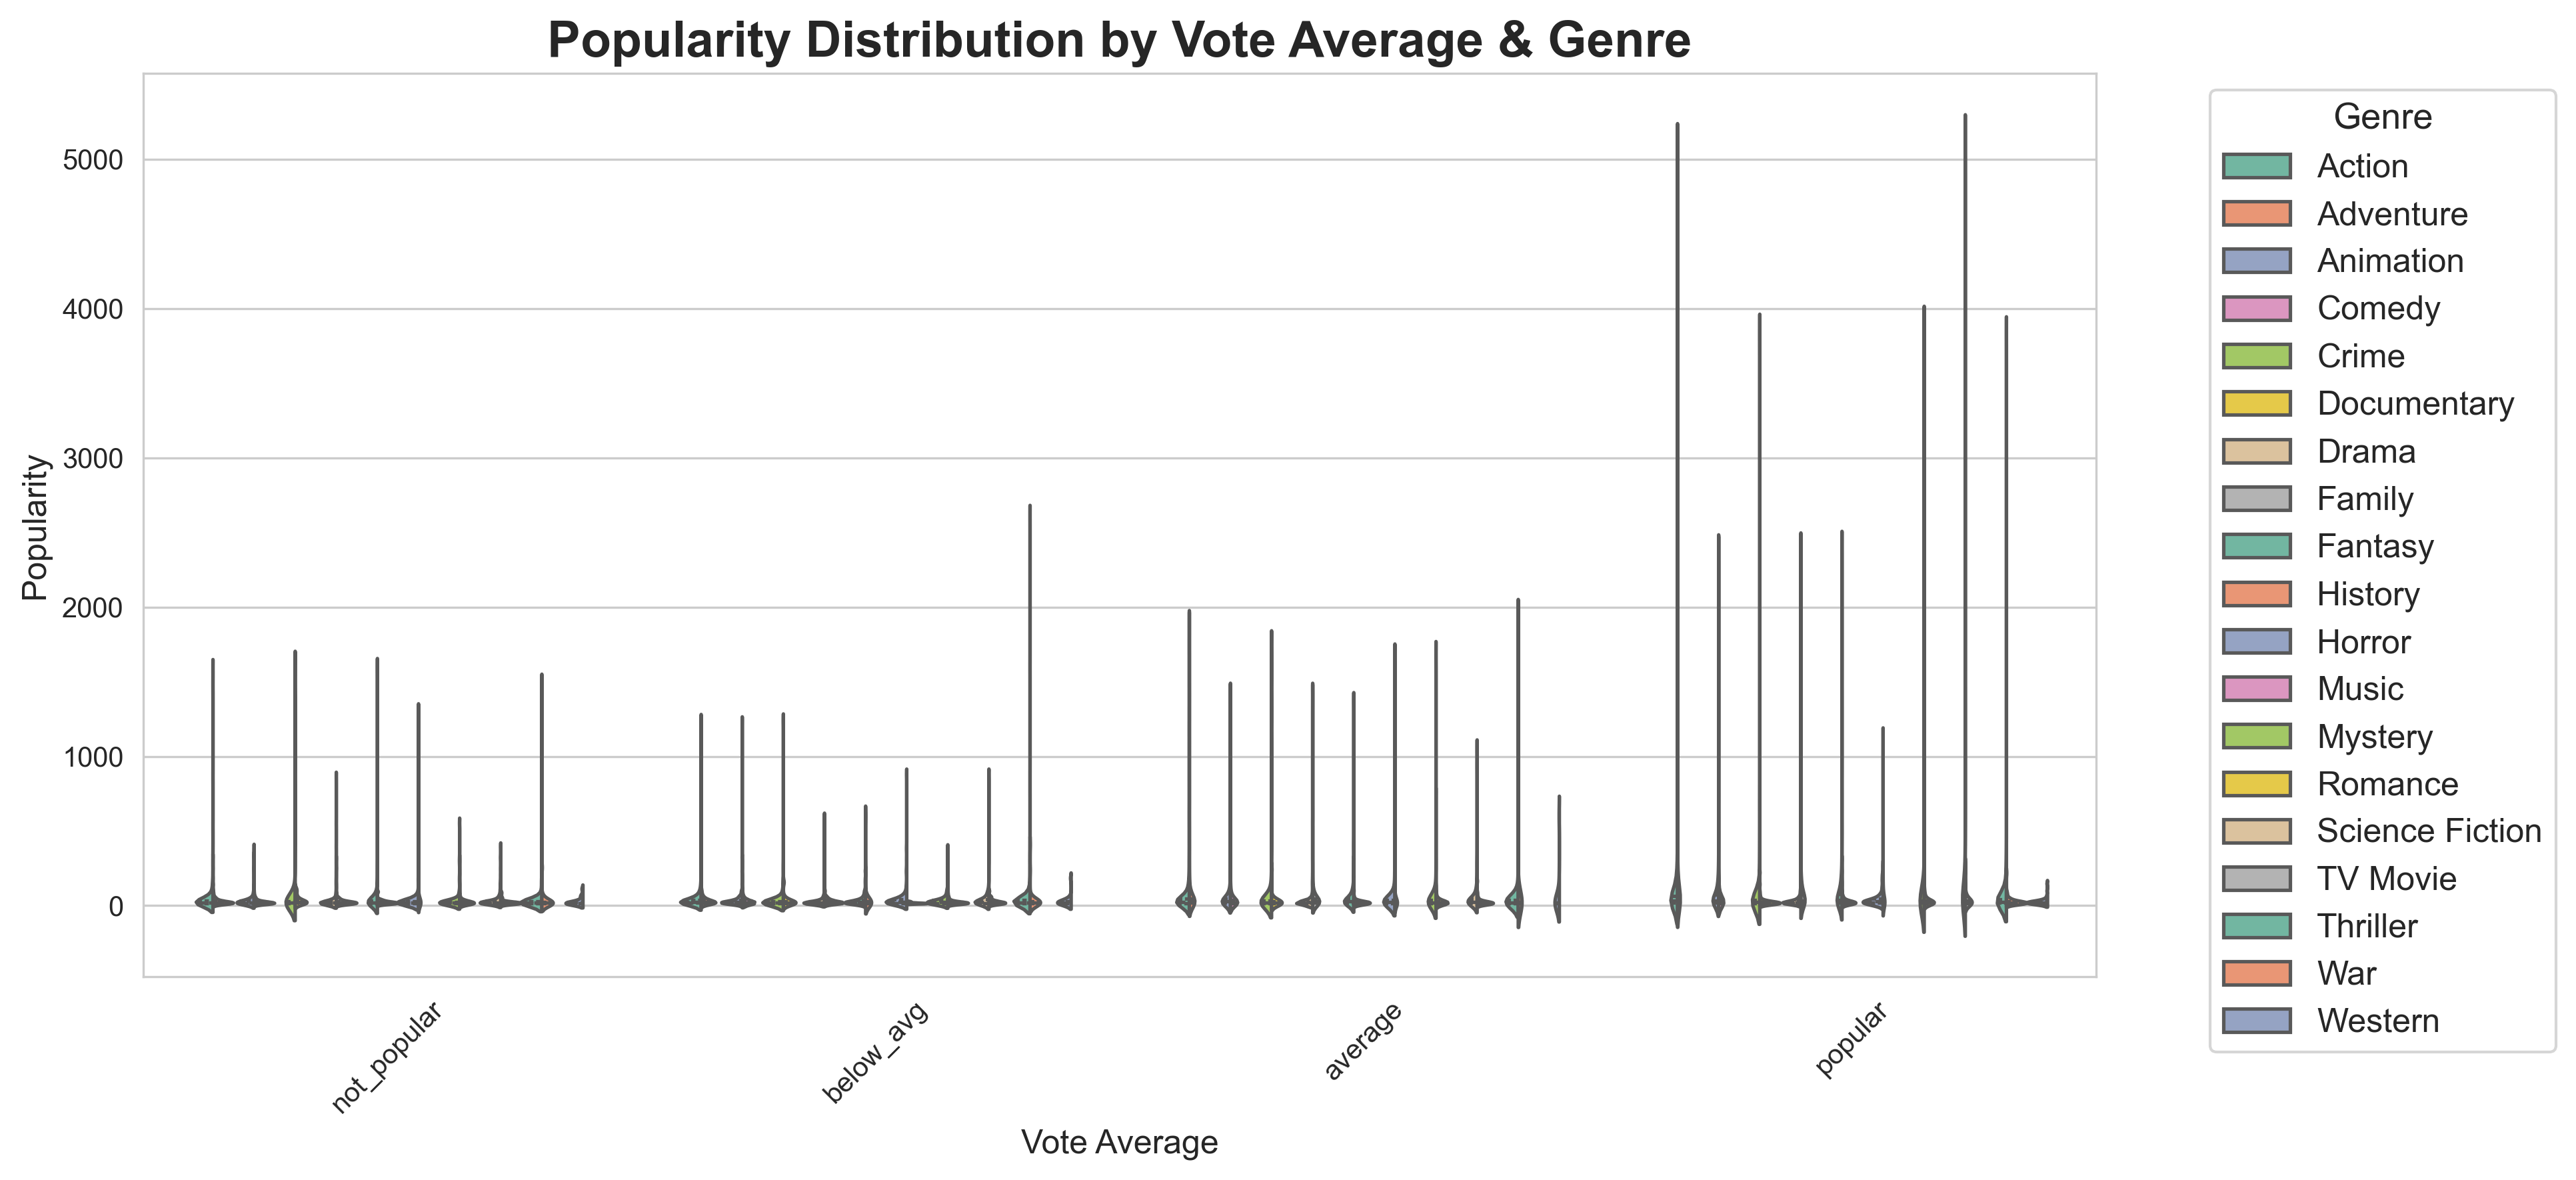

In [132]:
plt.figure(figsize=(13, 6), dpi=300)

# Violin plot showing popularity distributions for each vote average category, split by genre
sns.violinplot(x='Vote_Average', y='Popularity', hue='Genre', data=df, split=True, inner='quartile', palette='Set2')

plt.title('Popularity Distribution by Vote Average & Genre', fontsize=18, fontweight='bold')

# Improve readability by rotating x-axis tick labels if needed
plt.xticks(rotation=45, fontsize=10)

plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

plt.legend(title='Genre', fontsize=12, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


- **The violin plot displays the distribution of popularity scores within each vote average category, further split by genre using color shading. This shows how popularity varies across vote averages and genres simultaneously, revealing more nuanced patterns than simpler univariate or bivariate plots.**

# **4. Specialized Visualizations of Movie Dataset**

# **1. Top 10 Most Popular Movies - Horizontal Bar Chart with Color Gradient**

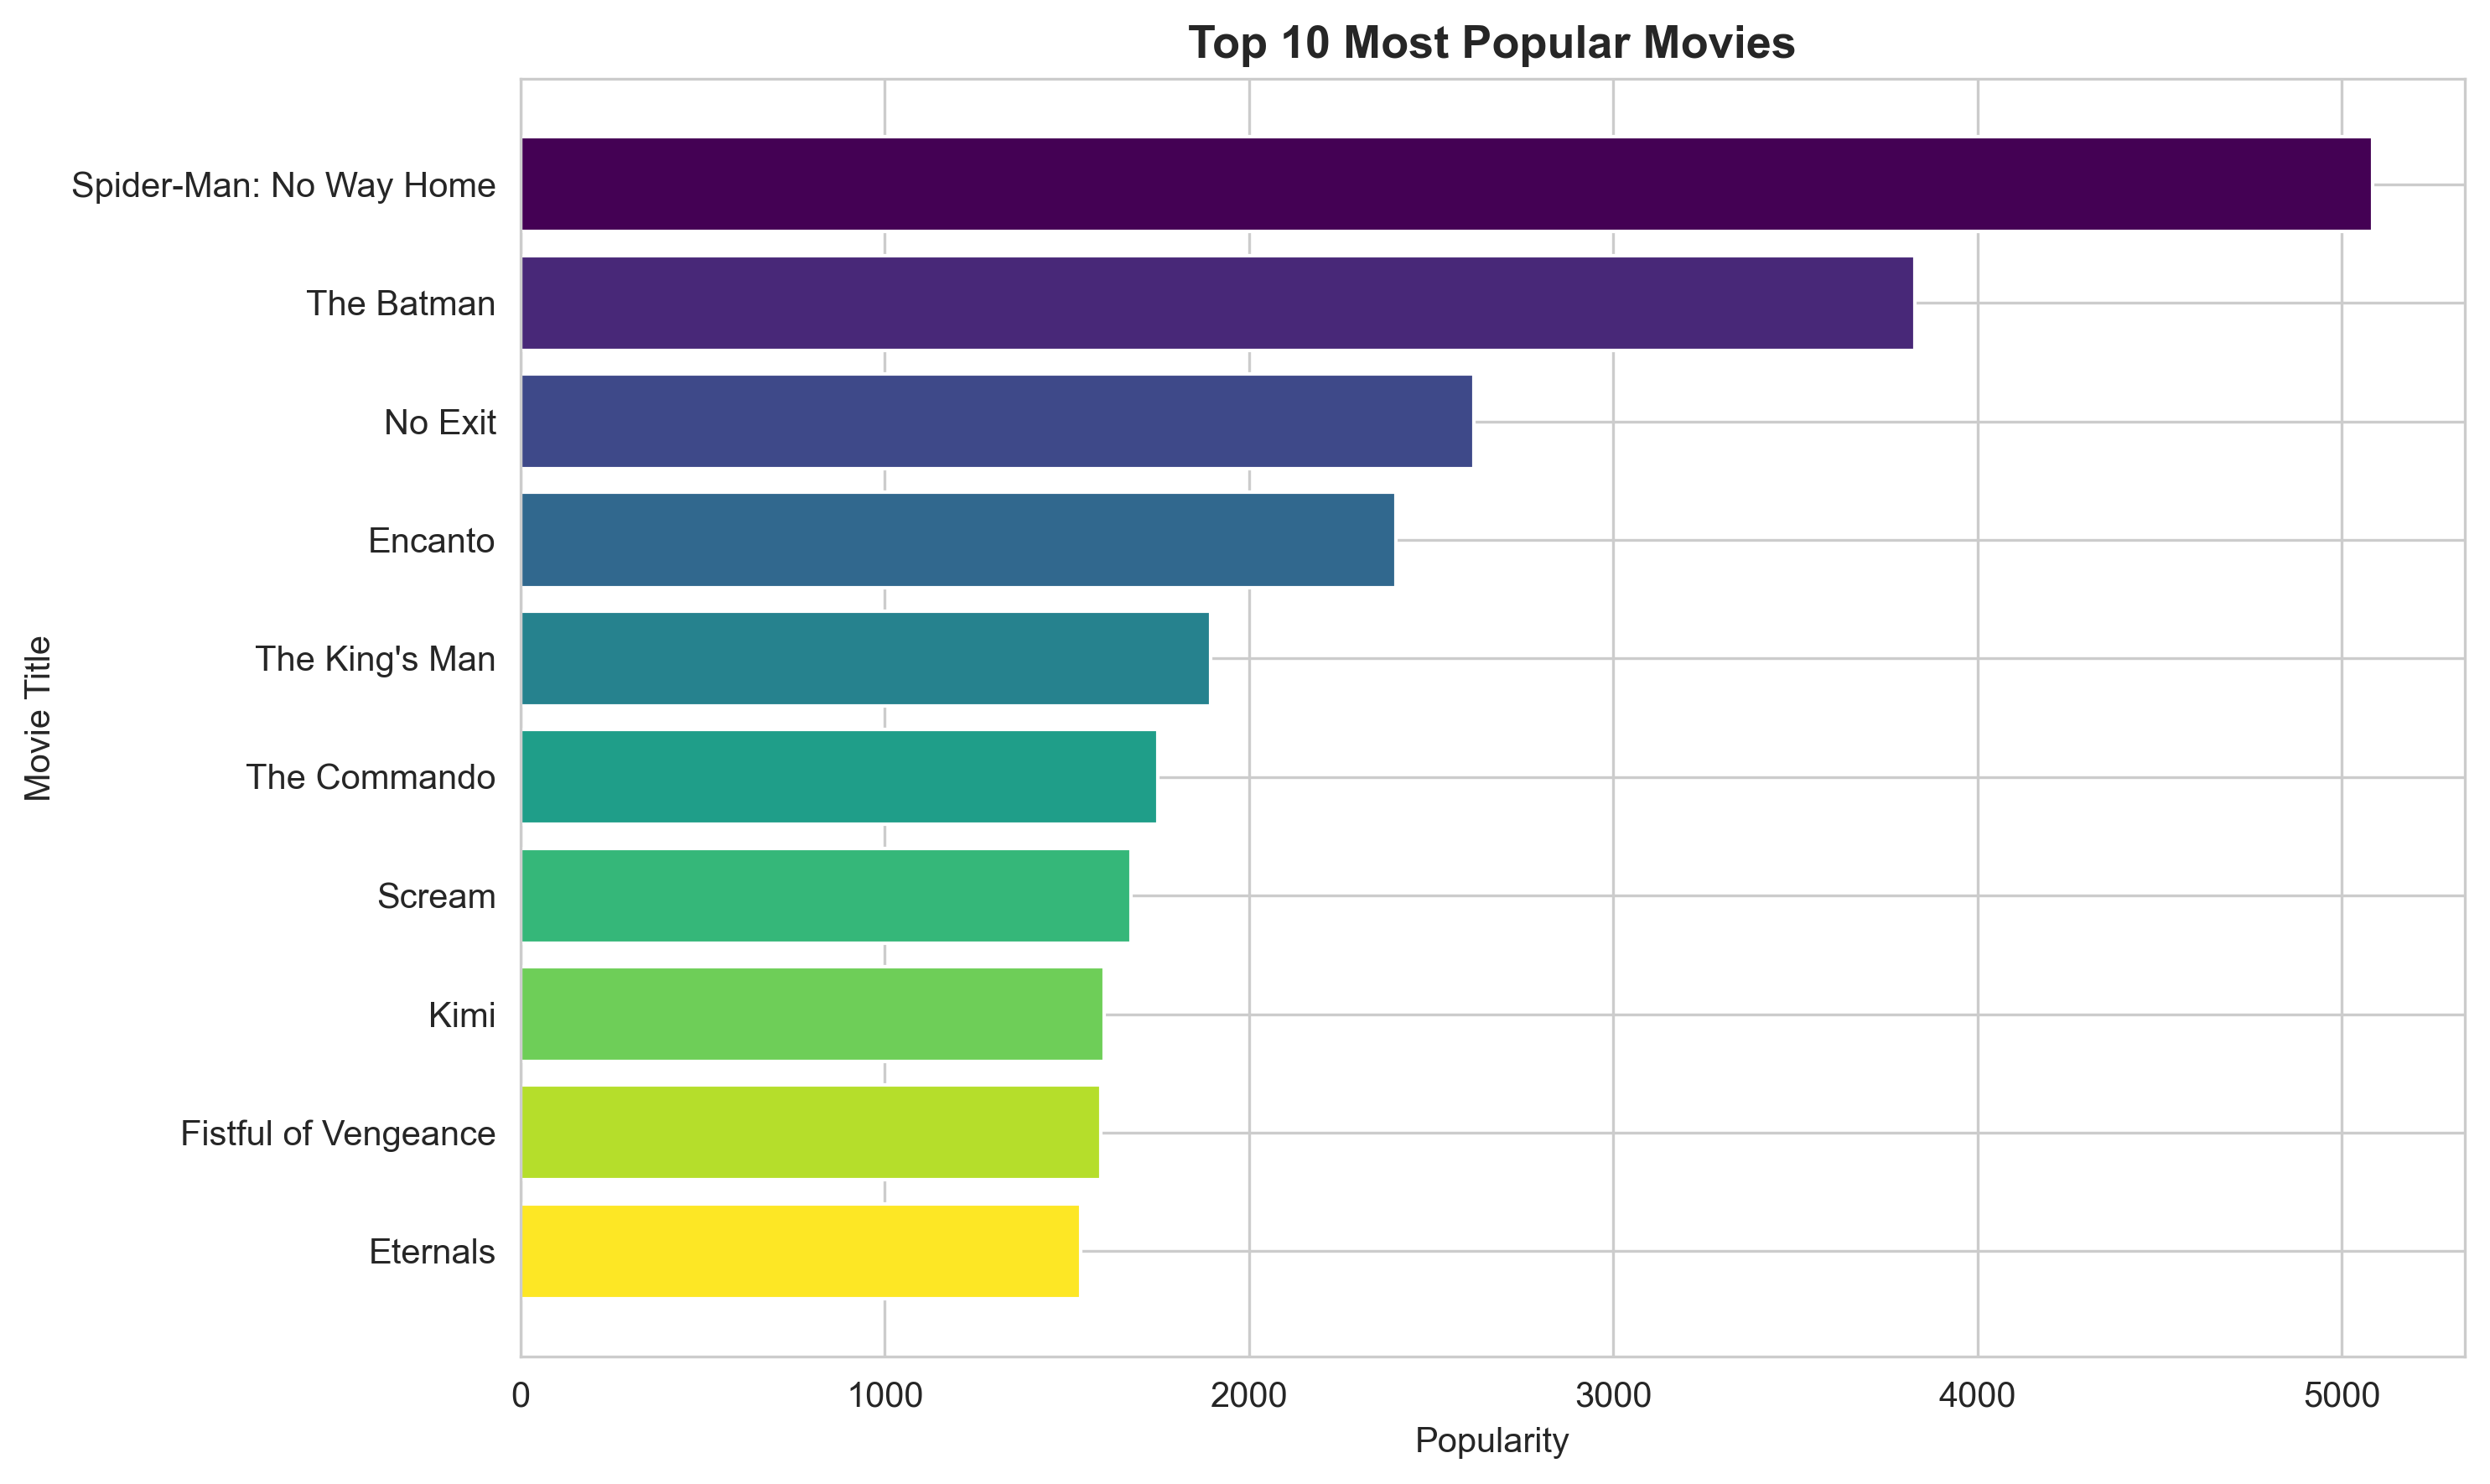

In [145]:
import matplotlib.cm as cm

# Calculate the top 10 movies by maximum popularity score
top10 = df.groupby('Title')['Popularity'].max().sort_values(ascending=False).head(10)

# Generate a color gradient using the viridis colormap
colors = cm.viridis(np.linspace(0, 1, len(top10)))

# Set figure size and DPI for high resolution
plt.figure(figsize=(10, 6), dpi=300)

# Use matplotlib's barh instead of seaborn to apply individual bar colors easily
bars = plt.barh(top10.index, top10.values, color=colors)

# Label axes and add a bold title with larger font size for clarity
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Movie Title', fontsize=10)
plt.title('Top 10 Most Popular Movies', fontsize=13, fontweight='bold')

# Invert y-axis so the most popular movie appears at the top
plt.gca().invert_yaxis()

# Improve layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



- **This plot shows the most popular movies by their maximum popularity value. Using a color gradient from the viridis colormap enhances visual appeal and helps distinguish individual bars. The horizontal bar chart allows long movie titles to be displayed clearly.**

# **2. Top Genres Over Time - Area Chart Showing Proportional Genre Composition by Year**

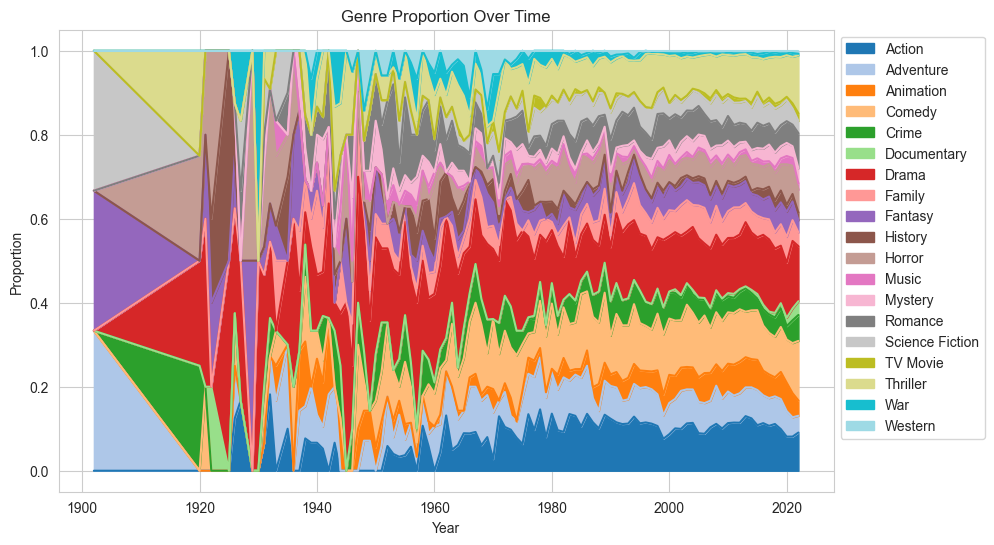

In [138]:
# b) Top Genres Over Time - Area Chart
genre_year_percent = genre_year.div(genre_year.sum(axis=1), axis=0)
genre_year_percent.plot.area(figsize=(10,6), colormap='tab20')
plt.title('Genre Proportion Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()



- **This area chart visualizes how the proportions of movie genres have changed over time relative to total annual production. Using proportional data helps understand genre popularity trends year over year rather than absolute counts. The qualitative colormap and partial transparency make the plot aesthetically pleasing and readable.**

# **5. Descriptive and Statistical Summaries of Movie Dataset**

# **1. Descriptive Statistics by Genre**

In [139]:
# Group the DataFrame by 'Genre' and compute descriptive statistics for 'Popularity' and 'Vote_Count' columns
desc_stats = df.groupby('Genre')[['Popularity', 'Vote_Count']].describe()

# Print the detailed descriptive statistics by genre
print("Descriptive Statistics by Genre:\n", desc_stats)


Descriptive Statistics by Genre:
                 Popularity                                                    \
                     count       mean         std     min       25%      50%   
Genre                                                                          
Action              2652.0  50.688837  145.091141  13.359  17.55025  24.3745   
Adventure           1829.0  53.785530  155.810085  13.359  17.75200  25.4600   
Animation           1426.0  52.449432  111.411007  13.360  18.60900  27.4270   
Comedy              3006.0  37.834018   83.454501  13.365  15.91600  20.5760   
Crime               1235.0  44.625692  159.755173  13.357  16.03150  19.9160   
Documentary          203.0  29.737700   34.212768  13.393  15.19750  19.1340   
Drama               3715.0  30.110546   46.304326  13.354  15.49000  19.0920   
Family              1405.0  46.458322  100.410792  13.357  17.50400  24.9320   
Fantasy             1295.0  52.986726  117.057564  13.357  17.89800  25.8880   
Histor

C:\Users\OM\AppData\Local\Temp\ipykernel_20340\343918640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_stats = df.groupby('Genre')[['Popularity', 'Vote_Count']].describe()


- **This code groups the dataset by each unique genre.**

- **Then it calculates detailed statistics separately for the numerical columns Popularity and Vote_Count within each genre.**

- **The output includes count, mean, std (standard deviation), min, max, and quartiles, providing a comprehensive profile of vote counts and popularity per genre.**

- **This helps to understand how these two metrics vary between different genres.**

# **6. Advanced Exploration of Movie Dataset**

# **1. Correlation Matrix Heatmap**

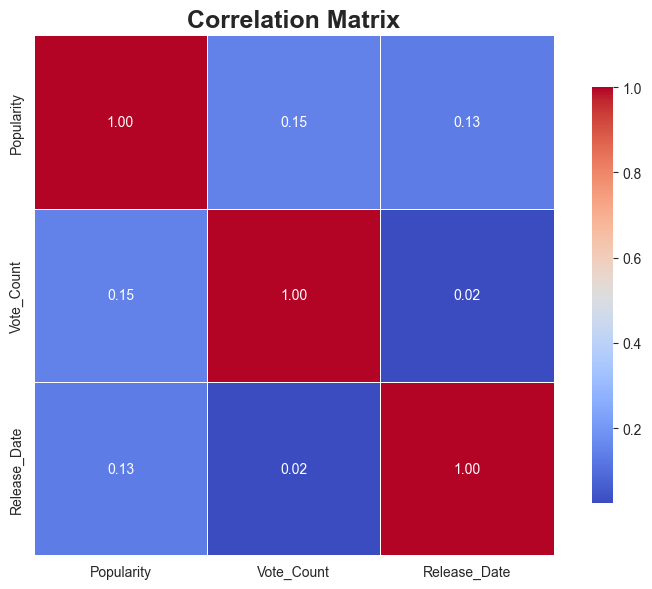

In [142]:

# Set figure size and DPI for high-resolution output
plt.figure(figsize=(8, 6))

# Compute correlation matrix for selected numerical columns
corr = df[['Popularity', 'Vote_Count', 'Release_Date']].corr()

# Plot heatmap with annotations showing correlation coefficients formatted to two decimals
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add a title with larger and bold font for clarity
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

- **The correlation matrix summarizes the linear relationships between the numerical features Popularity, Vote_Count, and Release_Date.**

- **Heatmap colors range from blue (negative correlation) to red (positive correlation) with a white middle (no correlation).**

- **Annotating the heatmap with correlation values (annot=True) helps in precisely reading the strength of each relationship.**

- **Adding slight linewidths and a square aspect ratio improves readability and aesthetics.**

# **2. Pairplot of Numerical Features**

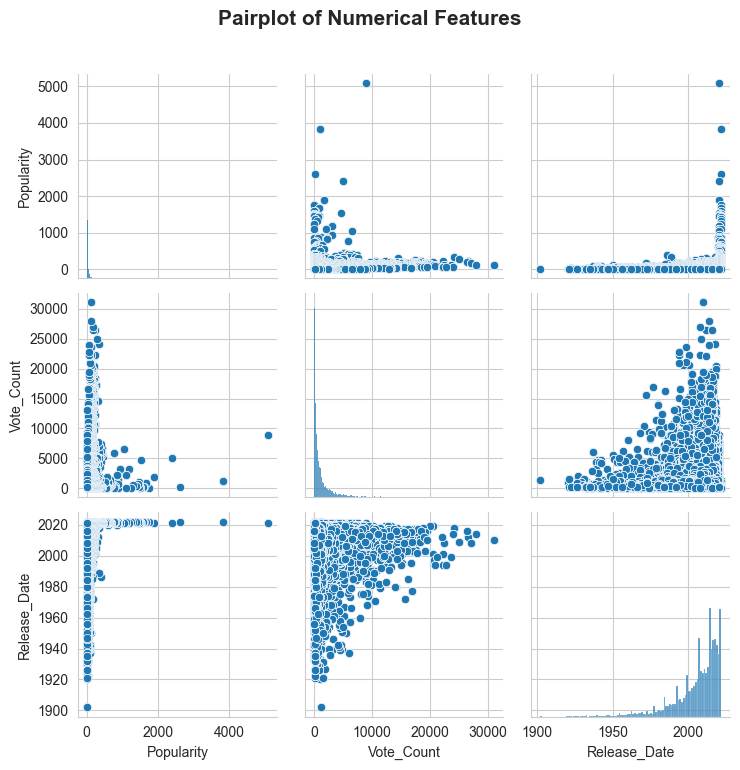

In [144]:
# Create pairplot to visualize relationships and distributions for selected numerical columns
sns.pairplot(df[['Popularity', 'Vote_Count', 'Release_Date']])

# Add a suptitle above the pairplot for context
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=15, fontweight='bold')

# Show the pairplot
plt.tight_layout()
plt.show()


- **The pairplot provides scatterplots for each pairwise combination of the numerical features, along with histograms (or KDE plots) showing the distributions on the diagonal.**

- **This visualization helps detect patterns, relationships, or potential outliers.**

- **The overall layout allows simultaneous examination of multiple variable interactions.**

# **Conclusions from Exploratory Data Analysis**

After performing detailed univariate, bivariate, multivariate, specialized visualizations, descriptive/statistical summaries, and advanced exploration, here are the key insights gathered from the movie dataset:

**1. Genre Distribution and Trends**

- Certain genres dominate the dataset (e.g., Action, Drama, Comedy), indicating skewed production preferences.

- Exploding multi-genre entries revealed more accurate counts per genre.

- Pie charts and bar plots confirmed that a handful of genres account for the majority of productions.

- Over the years, some genres have risen in popularity while others declined, as seen in stacked bar and area charts.

**2. Yearly Production Patterns**

- Movie production has increased over time, peaking around certain years.

- Sudden drops or spikes in production in specific years may be due to historical or industry-specific events.

- The line plot clearly showed long-term growth trends in the industry.

**3. Popularity & Voting Metrics**

- Vote Average is mostly concentrated around certain score ranges, with fewer extremely high or low ratings.

- Popularity and Vote Count distributions are right-skewed — a few movies achieve extremely high popularity and vote counts.

- Some genres (e.g., highly popular Action/Adventure) tend to have higher popularity scores.

**4. Bivariate Relationships**

- Popularity vs Vote Count (scatter plot): Positive correlation — movies with higher vote counts tend to have higher popularity.

- Heatmap by Genre vs Year: Revealed production trends at a genre level.

- Boxplots and Countplots: Showed that certain genres with specific vote averages dominate popularity.

- Different genres have different ranges and medians of popularity, suggesting varying audience interests.

**5. Multivariate Insights**

- FacetGrid scatter plots: Trending patterns between Release Year and Popularity vary for each genre.

- Violin plots: Showed distribution spreads of popularity for different combinations of vote averages and genres — some genres consistently maintain higher popularity across rating categories.

**6. Specialized Highlights**

Top 10 most popular movies list indicates that blockbuster hits dominate popularity scores.

Genre proportion over time: The share of certain genres (like Action & Drama) has remained strong, while niche genres show fluctuations.

**7. Descriptive and Statistical Summaries**
-
- Group-by statistics revealed:

High mean popularity in some genres despite low production counts.

Certain years had exceptionally high vote counts, possibly influenced by hit movies or increased audience engagement.

**8. Advanced Correlation Analysis**

**Correlation heatmap:**

- Popularity and Vote Count show a moderate positive correlation.

- Release Year is weakly correlated with popularity and vote count, meaning newer movies aren’t necessarily more popular, but production volume has grown.

- Pairplots confirmed these relationships and revealed the data's spread and clustering patterns.

**Overall Takeaways**

- The movie industry shows strong growth trends in production volume over the years.

- A few genres dominate, while niche genres maintain smaller but steady presence.

- High popularity is often tied to higher audience engagement (vote counts).

- Certain genres maintain consistent popularity across rating ranges.

- There is room to explore why some genres spike in certain years, pointing toward deeper causal analysis.